In [1]:
import matplotlib.pyplot as plt
import re
import pandas as pd
import h5py
import numpy as np
import seaborn as sns
from scipy.interpolate import interp1d
from common import CosmoInterpolator
import json
import healpy as hp

label_fontsize = 18
tick_fontsize = 18
title_fontsize = 18

plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Computer Modern"]
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rcParams["figure.figsize"] = (4, 3)


startup


In [ ]:
cosmo = CosmoInterpolator()
h5_path = "pe_results.h5"
h5f = h5py.File(h5_path, "r")
snr_threshold = 10.0


array(6.60765761)

In [3]:
processed_results = []
for source in h5f:
    # if "a=-0.99" in source:
    # Extract m1 and redshift using regex
    m1_match = re.search(r"m1=([0-9.eE+-]+)", source)
    z_match = re.search(r"z=([0-9.eE+-]+)", source)
    a_match = re.search(r"a=([0-9.eE+-]+)", source)
    if m1_match and z_match:
        m1 = float(m1_match.group(1))
        z = float(z_match.group(1))
        a = float(a_match.group(1))
        snr = h5f[source]["snr"][()]
        sky_loc = h5f[source]["sky_loc"][()]
        # print(h5f[source]["absolute_errors_a"]["error_detector"][...])
        # for key in h5f[source].keys():
        #     print(key)
        #     print(f"{key}: {h5f[source][key]['error_detector'][()].shape}")
        snr_cut = snr > snr_threshold
        sky_loc = sky_loc[snr_cut]
        temp_ = {key: h5f[source][key]["error_source"][snr_cut] for key in h5f[source].keys() if "error" in key}
        processed_results.append({'m1': m1, 'a': a, 'redshift': z, 'snr': snr[snr_cut], 'sky_loc': sky_loc, **temp_})

# Convert to DataFrame for easier analysis
df_results = pd.DataFrame(processed_results)
np.sum(df_results['a'] == 0.99),np.sum(df_results['a'] == -0.99),np.sum(df_results['a'] == 0.0),
print(df_results.columns.tolist())


['m1', 'a', 'redshift', 'snr', 'sky_loc', 'absolute_errors_Omega', 'absolute_errors_a', 'absolute_errors_dist', 'absolute_errors_e0', 'absolute_errors_iota', 'absolute_errors_p0', 'relative_errors_M', 'relative_errors_mu']


In [4]:
df_results

,m1,a,redshift,snr,sky_loc,absolute_errors_Omega,absolute_errors_a,absolute_errors_dist,absolute_errors_e0,absolute_errors_iota,absolute_errors_p0,relative_errors_M,relative_errors_mu
0,1000.0,0.99,0.044156,"[13.748318800329306, 19.17608846236964, 31.383...","[[2.4876218221174766, 3.8454859339949197], [0....","[50.70879877904513, 31.01067997792164, 10.5555...","[0.0171059569782631, 0.0058789112348208465, 0....","[0.03080137313827957, 0.025543785550856284, 0....","[0.020974978862232426, 0.007645505502256208, 0...","[0.0968504391367639, 0.1468621562878989, 0.225...","[2.519754592766798, 0.8416758034039155, 0.6354...","[0.023706906655812755, 0.01044960722816376, 0....","[0.020352908339810606, 0.00766713079195352, 0...."
1,10000.0,-0.99,0.103455,"[11.9204542406471, 13.31792193037997, 27.52685...","[[2.4876218221174766, 3.8454859339949197], [0....","[28.088235013572326, 16.4155446597412, 5.30096...","[0.0036946336919352774, 0.003503882273652604, ...","[0.047710992998512704, 0.08603040007049446, 0....","[2.110727027478529e-06, 2.072267738511945e-06,...","[0.06700288295531023, 0.12037013658898967, 0.1...","[0.0902601375376346, 0.08594884588968107, 0.03...","[0.009728970011978628, 0.01792596344236794, 0....","[0.010016349833201094, 0.017315523721615787, 0..."
2,10000.0,0.00,0.105428,"[11.653665482963016, 13.047877317773642, 28.34...","[[2.4876218221174766, 3.8454859339949197], [0....","[20.64856375730933, 12.010118208526556, 4.1857...","[0.0014070951318788947, 0.0012315034664610227,...","[0.048038549498273464, 0.08263849882067235, 0....","[9.555743923792391e-05, 8.832315645558021e-05,...","[0.070609248735449, 0.11481702112260048, 0.149...","[0.024872856441033153, 0.018660617684517884, 0...","[0.009768292687115532, 0.016734243862763325, 0...","[0.009717085701143564, 0.01671174033536344, 0...."
3,10000.0,0.99,0.105641,"[11.632613166262473, 13.013328093002581, 28.24...","[[2.4876218221174766, 3.8454859339949197], [0....","[34.27735023292119, 21.759920399007257, 9.5221...","[0.003660334723345682, 0.002963542196788871, 0...","[0.04808890153108235, 0.0827608956787496, 0.07...","[9.974449686991533e-06, 8.245879764567987e-06,...","[0.08266407305587725, 0.11783832887908807, 0.1...","[0.4787188394737054, 0.3947258810518734, 0.244...","[0.016686016611020343, 0.020327533326873013, 0...","[0.014000635455972982, 0.018536636078247837, 0..."
4,100000.0,-0.99,0.307754,"[11.050427269835717, 12.202048328998075, 28.00...","[[2.4876218221174766, 3.8454859339949197], [0....","[81.22018566529697, 46.51675912416694, 42.7740...","[0.006468219102060776, 0.0064317483513657075, ...","[0.16889364651009126, 0.3044836094096087, 0.26...","[9.584580797643279e-08, 8.412464759146548e-08,...","[0.08812642670249916, 0.1393321238998561, 0.15...","[0.045116239781962254, 0.04497724523447073, 0....","[0.02823679598202852, 0.05140506315025721, 0.0...","[0.02855549798053942, 0.050529868624348474, 0...."
5,100000.0,0.00,0.336469,"[11.201510629728142, 11.892308620199987, 28.38...","[[2.4876218221174766, 3.8454859339949197], [0....","[64.04588476383144, 35.09628638016191, 26.9596...","[0.014691226850625133, 0.015109564772903677, 0...","[0.19842478343904482, 0.3294512445110447, 0.27...","[1.141233535167471e-05, 1.0414925127806956e-05...","[0.08945038674805002, 0.12778580709821769, 0.1...","[0.02980022974626143, 0.03091394053900205, 0.0...","[0.031420292084238195, 0.05272130635819611, 0....","[0.033117244583389764, 0.05441221085395387, 0...."
6,100000.0,0.99,0.371968,"[11.315365083821481, 12.027790224434073, 28.80...","[[2.4876218221174766, 3.8454859339949197], [0....","[64.0576196169216, 32.44656726622889, 30.02022...","[0.0009031318465710569, 0.0007920236432386439,...","[0.21378809904544124, 0.36742514737631715, 0.3...","[0.02701596192303562, 0.02571138789254768, 0.0...","[0.09153328381625615, 0.12868436388962584, 0.1...","[0.08489355510662441, 0.07357625877609177, 0.0...","[0.03575764367534701, 0.05787119212726686, 0.0...","[0.03544960665127557, 0.05986603976354519, 0.0..."
7,10

In [31]:
m1_list = np.unique(df_results["m1"].to_numpy())

def get_error(error_name='relative_errors_M', a=0.99):
    df_temp = df_results[(df_results['a'] == a)]
    snr = df_temp["snr"][(df_results['a'] == a)].to_numpy()    
    err = df_temp[error_name].to_numpy()
    mlist = df_results["m1"][(df_results['a'] == a)].to_numpy()
    skyloc = df_temp["sky_loc"][(df_results['a'] == a)].to_numpy()
    dl = cosmo.get_luminosity_distance(df_temp["redshift"].to_numpy())
    return mlist, err, snr, skyloc, dl

mvec, errors, snr_values, skyloc_values, dl_values =  get_error()

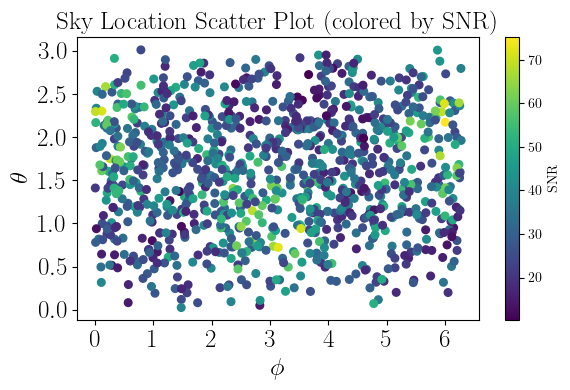

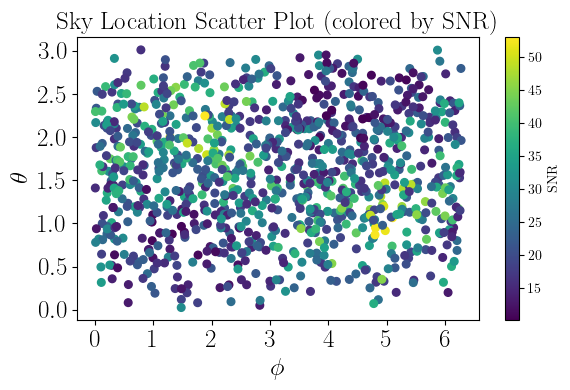

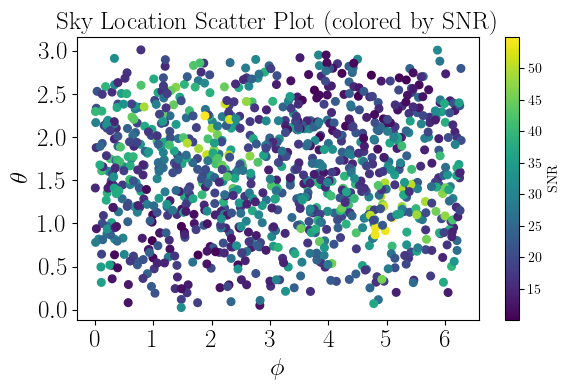

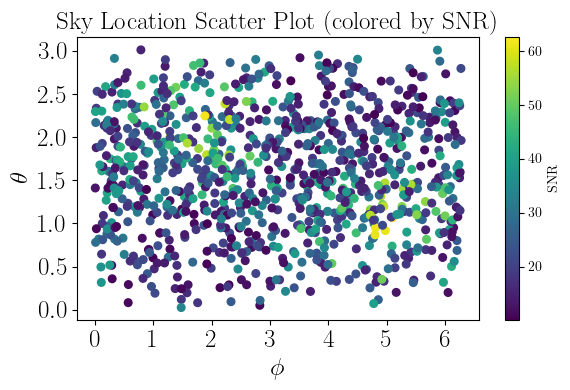

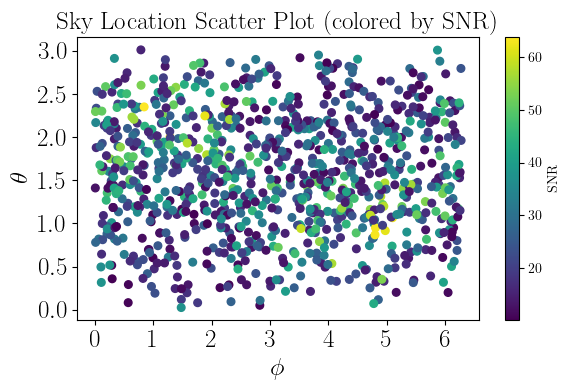

In [32]:
ind = 0
for ind in range(len(mvec)):

    sky_loc = skyloc_values[ind]
    theta = sky_loc[:, 0]
    phi = sky_loc[:, 1]
    plt.figure(figsize=(6, 4))
    sc = plt.scatter(phi, theta, c=snr_values[ind], cmap='viridis', s=30)
    plt.colorbar(sc, label='SNR')
    plt.xlabel(r'$\phi$', fontsize=label_fontsize)
    plt.ylabel(r'$\theta$', fontsize=label_fontsize)
    plt.title('Sky Location Scatter Plot (colored by SNR)', fontsize=title_fontsize)
    plt.xticks(fontsize=tick_fontsize)
    plt.yticks(fontsize=tick_fontsize)
    plt.tight_layout()
    plt.show()


<>:11: SyntaxWarning: invalid escape sequence '\l'
<>:14: SyntaxWarning: invalid escape sequence '\l'
<>:11: SyntaxWarning: invalid escape sequence '\l'
<>:14: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_2176866/1254906491.py:11: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel(f"$\log_{{10}}$ {ylabel}/{ylabel}", fontsize=label_fontsize)
/tmp/ipykernel_2176866/1254906491.py:14: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel(f"$\log_{{10}}$ {ylabel}", fontsize=label_fontsize)


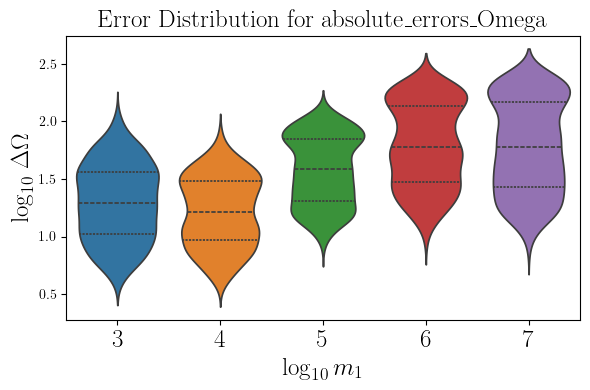

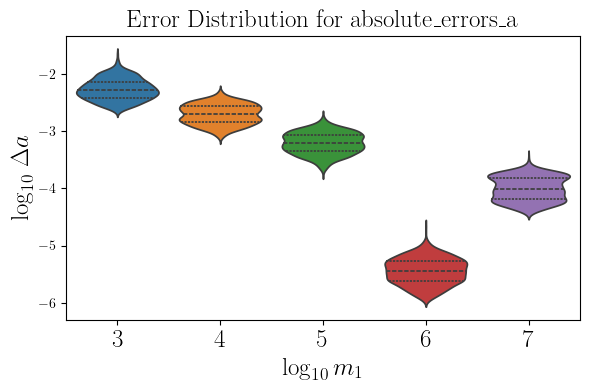

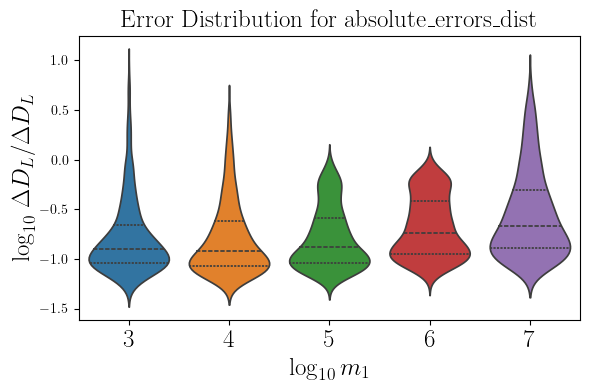

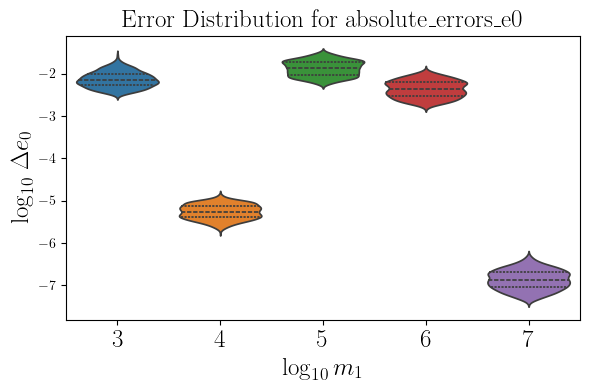

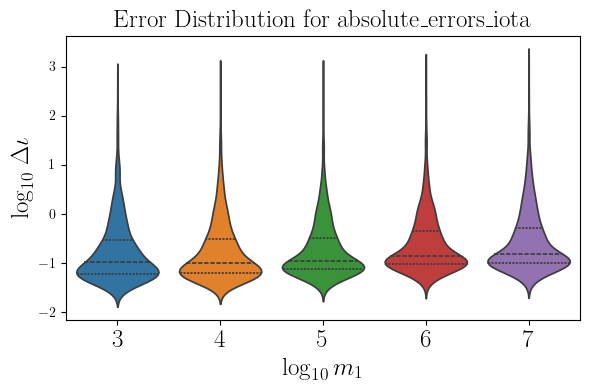

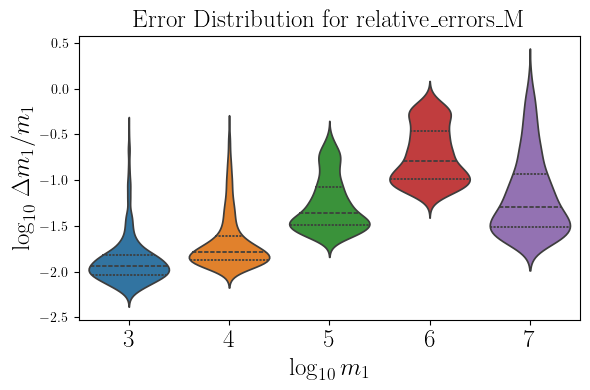

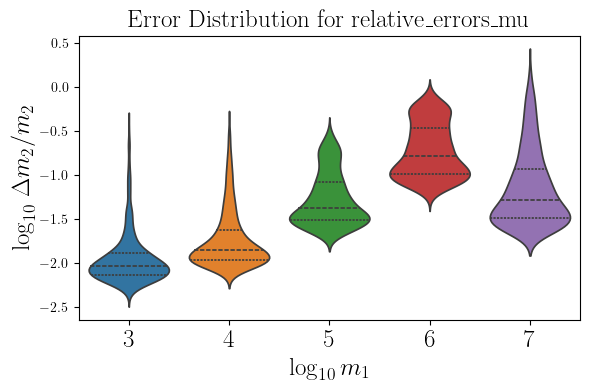

In [35]:
from matplotlib.ticker import ScalarFormatter

list_error_names =  ['absolute_errors_Omega', 'absolute_errors_a', 'absolute_errors_dist', 'absolute_errors_e0', 'absolute_errors_iota', 'relative_errors_M', 'relative_errors_mu']
ylabels = [r"$\Delta \Omega$", r"$\Delta a$", r"$\Delta D_L$", r"$\Delta e_0$", r"$\Delta \iota$", r"$\Delta m_1/m_1$", r"$\Delta m_2/m_2$"]
for ername, ylabel in zip(list_error_names, ylabels):
    mvec, errors, snr_values, sky, dl = get_error(error_name=ername)
    
    plt.figure(figsize=(6, 4))
    if ername == 'absolute_errors_dist':
        sns.violinplot(data=[np.log10(errors[0]/dl[0]), np.log10(errors[1]/dl[1]), np.log10(errors[2]/dl[2]), np.log10(errors[3]/dl[3]), np.log10(errors[4]/dl[4])], inner="quartile")
        plt.ylabel(f"$\log_{{10}}$ {ylabel}/{ylabel}", fontsize=label_fontsize)
    else:
        sns.violinplot(data=[np.log10(errors[0]), np.log10(errors[1]), np.log10(errors[2]), np.log10(errors[3]), np.log10(errors[4])], inner="quartile")
        plt.ylabel(f"$\log_{{10}}$ {ylabel}", fontsize=label_fontsize)
    plt.xticks(ticks=np.arange(len(mvec)), labels=[f"{int(np.log10(m))}" for m in mvec], fontsize=tick_fontsize)
    plt.xlabel(r"$\log_{{10}}m_1$", fontsize=label_fontsize)
    
    plt.title(f"Error Distribution for {ername}", fontsize=title_fontsize)
    # plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    # plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

    plt.tight_layout()
    plt.show()


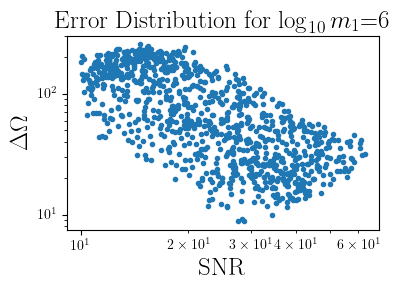

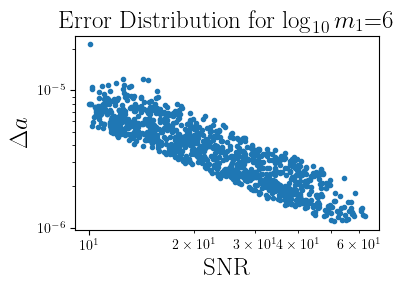

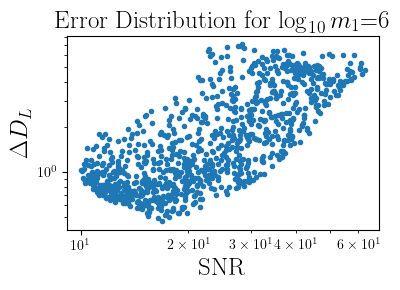

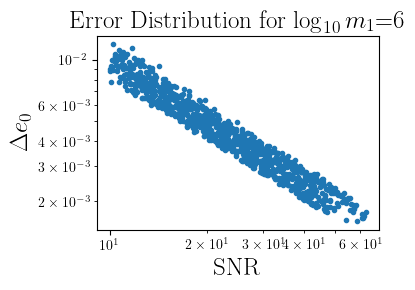

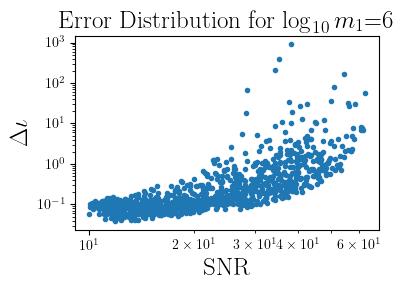

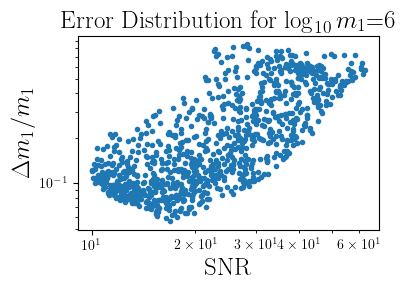

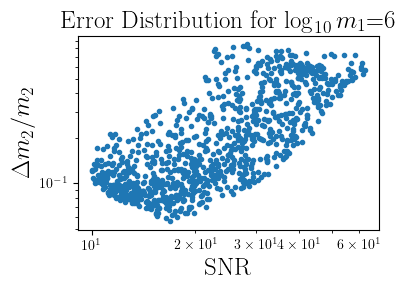

In [16]:
list_error_names =  ['absolute_errors_Omega', 'absolute_errors_a', 'absolute_errors_dist', 'absolute_errors_e0', 'absolute_errors_iota', 'relative_errors_M', 'relative_errors_mu']
ylabels = [r"$\Delta \Omega$", r"$\Delta a$", r"$\Delta D_L$", r"$\Delta e_0$", r"$\Delta \iota$", r"$\Delta m_1/m_1$", r"$\Delta m_2/m_2$"]
mvec, errors, snr_values, sky = get_error(error_name=ername)

ind = 3

for ername, ylabel in zip(list_error_names, ylabels):
    mvec, errors, snr_values, sky = get_error(error_name=ername)
    plt.figure()
    plt.title(fr"Error Distribution for $\log_{{10}} m_1$={int(np.log10(mvec[ind]))}", fontsize=title_fontsize)
    plt.loglog(snr_values[ind], errors[ind], '.')
    plt.xlabel(r"SNR", fontsize=label_fontsize)
    plt.ylabel(f"{ylabel}", fontsize=label_fontsize)
    # plt.title(f"Error Distribution for {ername}", fontsize=title_fontsize)
    plt.tight_layout()
    plt.show()


In [17]:
list_error_names

['absolute_errors_Omega',
 'absolute_errors_a',
 'absolute_errors_dist',
 'absolute_errors_e0',
 'absolute_errors_iota',
 'relative_errors_M',
 'relative_errors_mu']

<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:6: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_2176866/490210829.py:6: SyntaxWarning: invalid escape sequence '\l'
  plt.loglog(err_x[0], err_y[0], '.', label=f"$\log_{{10}} m_1$={int(np.log10(mvec[0]))}")


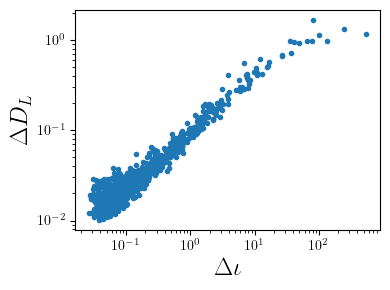

In [20]:
ername = 'absolute_errors_iota'
mvec, err_x, snr_values, sky = get_error(error_name=ername)
ername = 'absolute_errors_dist'
mvec, err_y, snr_values, sky = get_error(error_name=ername)
plt.figure()
plt.loglog(err_x[0], err_y[0], '.', label=f"$\log_{{10}} m_1$={int(np.log10(mvec[0]))}")
plt.xlabel(r"$\Delta \iota$", fontsize=label_fontsize)
plt.ylabel(r"$\Delta D_L$", fontsize=label_fontsize)
plt.tight_layout()
plt.show()

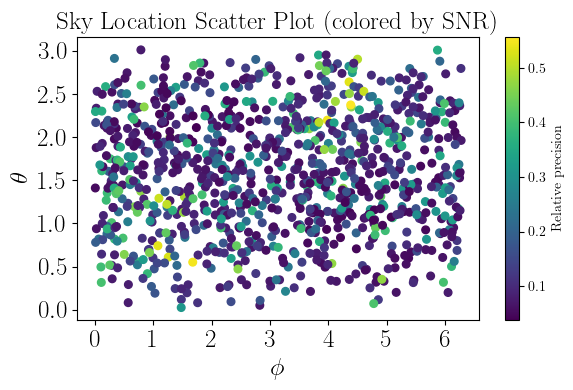

In [70]:
ind = 1
ername, ylabel = list_error_names[5], ylabels[5]
mvec, errors, snr_values, sky = get_error(error_name=ername)

sky_loc = sky[ind]
theta = sky_loc[:, 0]
phi = sky_loc[:, 1]
plt.figure(figsize=(6, 4))
sc = plt.scatter(phi, theta, c=errors[ind], cmap='viridis', s=30)
plt.colorbar(sc, label='Relative precision')
plt.xlabel(r'$\phi$', fontsize=label_fontsize)
plt.ylabel(r'$\theta$', fontsize=label_fontsize)
plt.title('Sky Location Scatter Plot (colored by SNR)', fontsize=title_fontsize)
plt.xticks(fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)
plt.tight_layout()
plt.show()